# Maximización de utilidades de una fábrica de mobiliario para muñecas 

## Objetivos
* Maximizar 
* Diseñar un modelo de programación lineal para resolver este problema en base a las restricciones dadas
* Encontrar qué cantidad de minisillas y minimesas producir para que obtengamos la mayor cantidad de ganancias

## Modelo que representa el problema

La función a maximizar viene dada por

$$\max_{x_1,x_2}  2000x_1 + 3000x_2$$

donde las variables de restricción son

+ **$x_1$: Número de minimesas a producir diariamente por operario**
+ **$x_2$: Número de minisillas a producir diariamente por operario**

y las restricciones son las siguientes:

+ El número total de unidades de los dos tipos no podrá exceder de cuatro por día y operario. 
+ Cada minimesa requiere dos horas para su fabricación; cada minisilla, tres horas. La jornada laboral máxima es de diez horas.
+ El material utilizado en cada minimesa cuesta 400 u.m. El utilizado en cada minisilla cuesta 200 u.m. Cada operario dispone de 1200 u.m. diarias para material. 

+ $x_1 + x_2 \leq 4$
+ $2x_1 + 3x_2 \leq 10$
+ $400x_1 + 200x_2 \leq 1200$
+ $x_1 + x_2 \geq 1$

| Producto  | Precio | T. Fabricación | Costo |
|-----------|--------|----------------|-------|
| Minimesa  | 2000   | 2              | 400   |
| Minisilla | 3000   | 3              | 200   |

## Solución del problema

In [57]:
import numpy as np
import sympy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
c = -np.array([2000,3000])
A = np.array([[1,1],
              [2,3],
              [400,200],
              [-1,-1]])
b = np.array([4,10,1200,-1])
sol = opt.linprog(c,A,b,method='simplex')
sol

     con: array([], dtype=float64)
     fun: -10000.0
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([0., 0., 0., 3.])
  status: 0
 success: True
       x: array([2., 2.])

+ **2 minimesas**
+ **2 minisillas**

In [37]:
def res1(x1):
    return 4-x1

def res2(x1):
    return (10-2*x1)/3

def res3(x1):
    return (1200-400*x1)/200

def res4(x1):
    return 1-x1

def utilidad(x1,x2):
    return 2000*x1+3000*x2

In [38]:
xnum = np.linspace(0,5,200)

R1 = res1(xnum)
R2 = res2(xnum)
R3 = res3(xnum)
R4 = res4(xnum)

In [42]:
utilidad(0,(10/3)), utilidad(3,0), utilidad(2,2)

(10000.0, 6000, 10000)

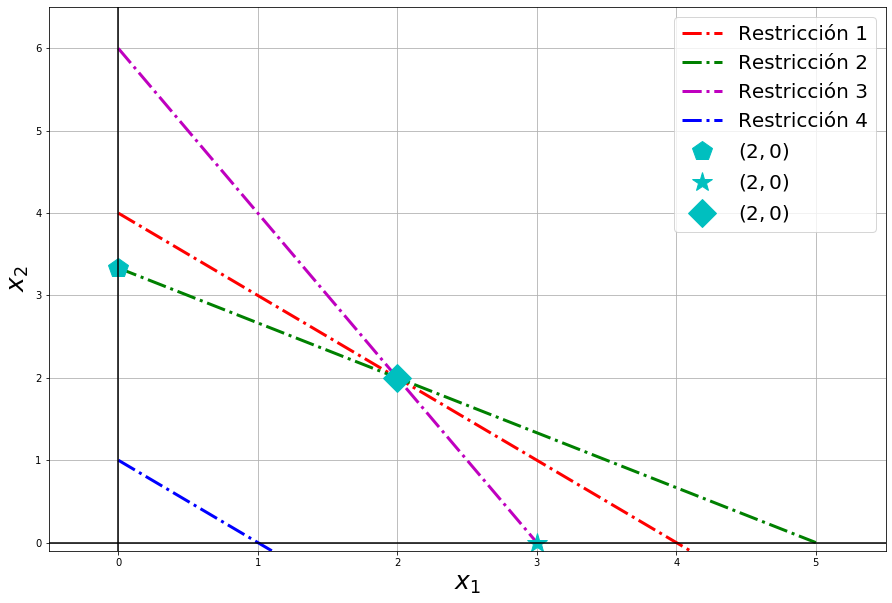

In [64]:
plt.figure(figsize=(15,10))

plt.plot(xnum,R1,'-.r',lw=3,label='Restricción 1')
plt.plot(xnum,R2,'-.g',lw=3,label='Restricción 2')
plt.plot(xnum,R3,'-.m',lw=3,label='Restricción 3')
plt.plot(xnum,R4,'-.b',lw=3,label='Restricción 4')
plt.plot([0],[3.33],'pc', ms=20, label='$(2,0)$')
plt.plot([3],[0],'*c', ms=20, label='$(2,0)$')
plt.plot([2],[2],'Dc', ms=20, label='$(2,0)$')
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.xlim([-.5,5.5])
plt.ylim([-.1,6.5])

plt.xlabel('$x_1$',fontsize=25)
plt.ylabel('$x_2$',fontsize=25)

plt.legend(loc='best',fontsize=20)
plt.grid()
plt.show()

## Resultado
Maximizamos nuestras ganancias cuando producimos **2 minimesas y 2 minisillas** al día, y cuando producimos 10/3 de minisillas, pero como ésta no es una solución factible, nos quedamos con la primera solución.

## Conclusiones
Solucionamos el problema planteando una función a optimizar o funcional de costo, con las respectivas restricciones acordes a las limitantes o condiciones que se establecen.

Al desarrollar la solución, encontramos que había dos combinaciones que daban la mayor utilidad, produciendo 10/3 de minisillas y ninguna minimesa, y produciendo 2 unidades de cada producto, pero como no es posible producir 10/3 de silla, debido a nuestras restricciones tendríamos que reducir a 3, y por lo tanto ya no tendríamos las mayores ganancias.

Por este motivo, la única solución que satisface por completo nuestras necesidades, es produciendo 2 unidades de cada producto

## Referencias
(2006). En G. Jiménez, & V. Quesada, *Cien problemas de programación lineal* (págs. 1-43). Manizales: Universidad Nacional de Colombia sede Manizales.

